In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv("collegiate_athlete_injury_dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (200, 17)
  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1                     2   

   Rest_Between_Events_Days  Fatigue_

In [5]:
print("\n--- INFO ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance

In [6]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(exclude=np.number).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
le = LabelEncoder()
for col in df.select_dtypes(exclude=np.number).columns:
    df[col] = le.fit_transform(df[col])

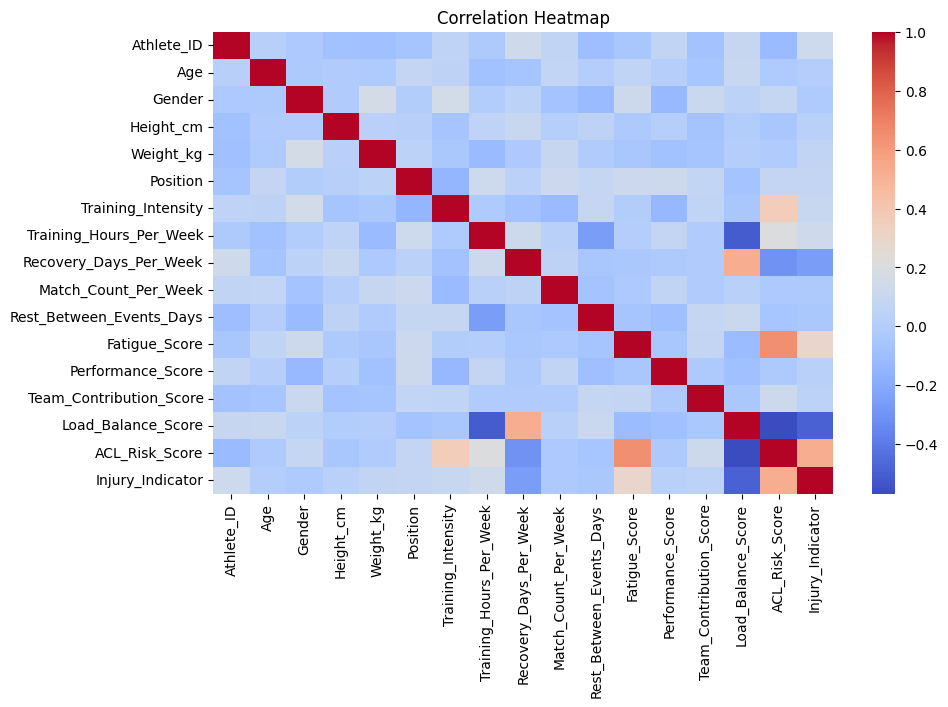

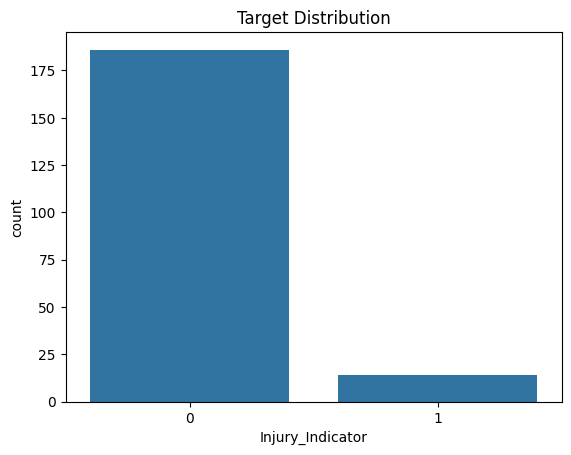

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

target_col = "Performance_Level"
if target_col not in df.columns:
    target_col = df.columns[-1]

sns.countplot(x=target_col, data=df)
plt.title("Target Distribution")
plt.show()

In [9]:
X = df.drop(target_col, axis=1)
y = df[target_col]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


In [12]:
results = []
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr')
    except:
        auc = None
    print(f"Accuracy: {acc:.4f}")
    if auc:
        print(f"ROC-AUC: {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": auc
    })


===== Logistic Regression =====
Accuracy: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.67      0.80         3

    accuracy                           0.97        40
   macro avg       0.99      0.83      0.89        40
weighted avg       0.98      0.97      0.97        40


===== SVM =====
Accuracy: 0.9250

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       0.00      0.00      0.00         3

    accuracy                           0.93        40
   macro avg       0.46      0.50      0.48        40
weighted avg       0.86      0.93      0.89        40


===== Random Forest =====


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40


===== Gradient Boosting =====
Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40


===== KNN =====
Accuracy: 0.9250

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       0.00      0.00      0.00         3

    accu

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40


===== Extra Trees =====
Accuracy: 0.9250

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       0.00      0.00      0.00         3

    accuracy                           0.93        40
   macro avg       0.46      0.50      0.48        40
weighted avg       0.86      0.93      0.89        40


===== XGBoost =====


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/t

Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.33      0.50         3

    accuracy                           0.95        40
   macro avg       0.97      0.67      0.74        40
weighted avg       0.95      0.95      0.94        40




=== Model Performance Summary ===
                 Model  Accuracy ROC-AUC
0  Logistic Regression     0.975    None
2        Random Forest     0.950    None
9              XGBoost     0.950    None
3    Gradient Boosting     0.950    None
5          Naive Bayes     0.950    None
6        Decision Tree     0.950    None
7             AdaBoost     0.950    None
1                  SVM     0.925    None
4                  KNN     0.925    None
8          Extra Trees     0.925    None


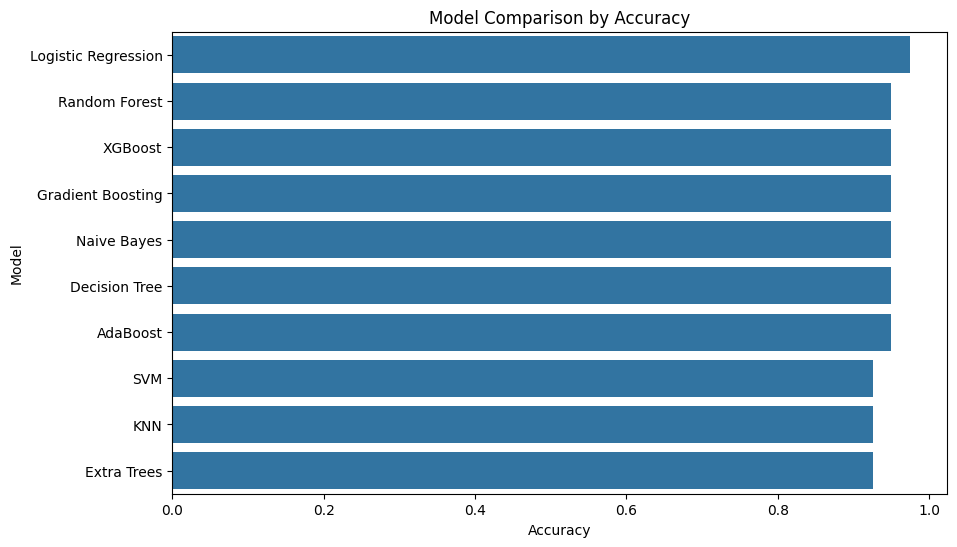

In [13]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Performance Summary ===")
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title("Model Comparison by Accuracy")
plt.show()

In [14]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh')
    plt.title(f"Top 10 Important Features ({best_model_name})")
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has fea

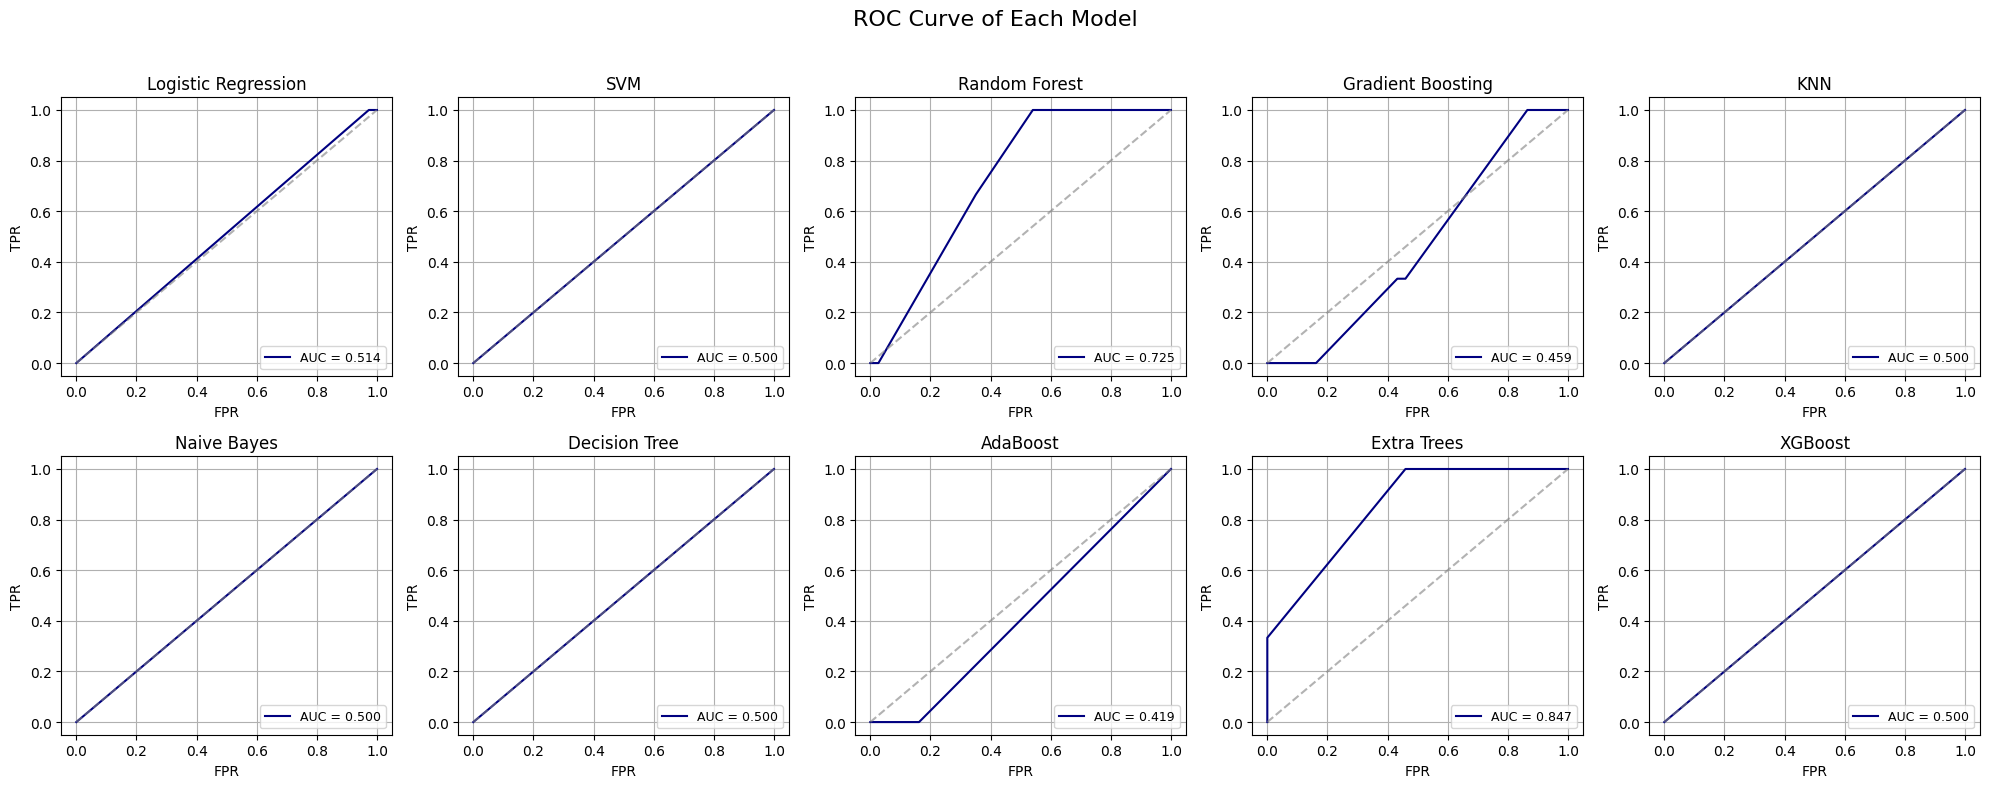

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model_names = list(models.keys())
n_models = len(model_names)
cols = 5
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, name in enumerate(model_names):
    model = models[name]

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    ax = axes[i]
    ax.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", color='navy')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6)
    ax.set_title(name)
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.legend(loc="lower right", fontsize=9)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("ROC Curve of Each Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:23:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


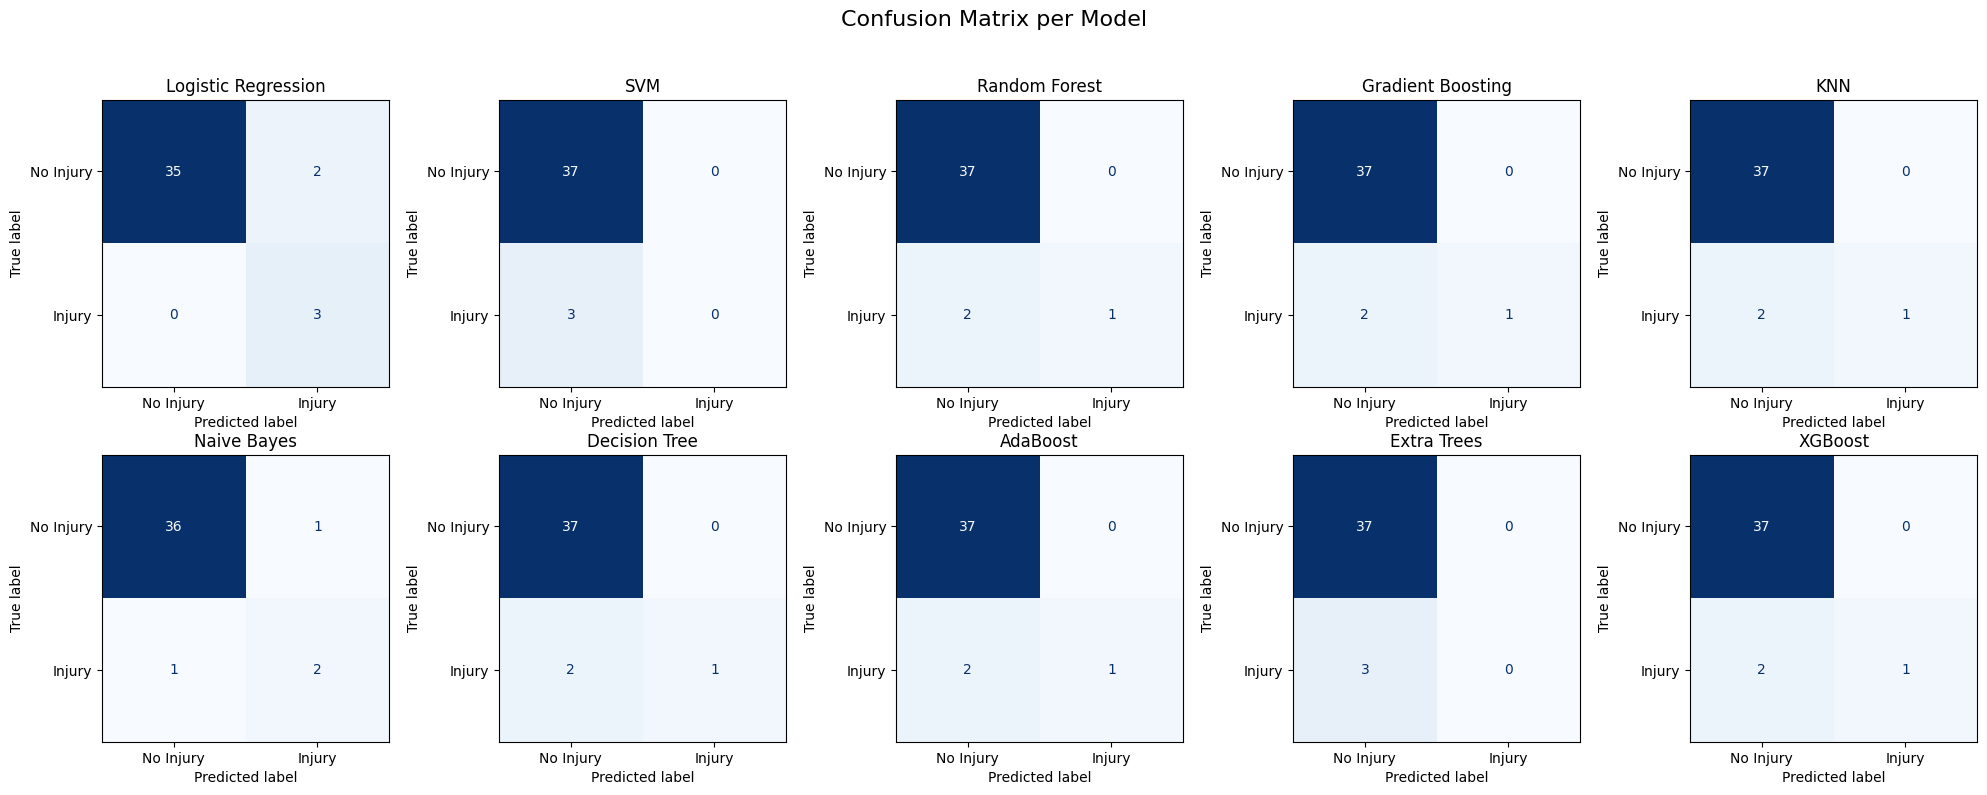

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_names = list(models.keys())
n_models = len(model_names)
cols = 5
rows = (n_models + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i, name in enumerate(model_names):
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Injury", "Injury"])
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].title.set_text(name)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Confusion Matrix per Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
